In [1]:
# Project create by: Justyna Gapys, Aleksandra Okrój, Patryk Pawłowicz (gr. S22-32)

In [2]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os           
import fnmatch       
import sys
from datetime import datetime
import csv
import matplotlib.pyplot as plt

             App        Category  Rating Reviews Size     Installs  Type  \
1176  McDonald's  FOOD_AND_DRINK     3.6  145323  42M  10,000,000+  Free   
8727  McDonald's  FOOD_AND_DRINK     3.6  145646  42M  10,000,000+  Free   

     Price Content Rating        Genres   Last Updated Current Ver Android Ver  
1176     0       Everyone  Food & Drink  July 31, 2018      5.15.0  4.4 and up  
8727     0       Everyone  Food & Drink  July 31, 2018      5.15.0  4.4 and up  
 

All users:
justyna_gapys 11/05/2020, 11:15:41
ola_okroj 11/05/2020, 11:09:25
ola_ola 11/05/2020, 09:10:50
Total number of users: 3
And here is a chart for entire dataset of RATING  
AxesSubplot(0.125,0.125;0.775x0.755) 

Okay, your ascending statistic is done!



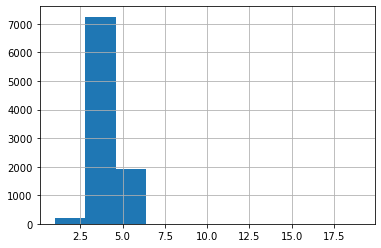

In [16]:
class GooglePlaySearch:

    def saveUserSearch():
        name=input("Enter your name: ")             
        surname=input("Enter your surname: ")       
        global user
        user = name+"_"+surname                     
        userFile=user+".txt"                         
        global now
        now = datetime.now()
        global newSearch
        newSearch = now.strftime("%m/%d/%Y, %H:%M:%S") 

        os.chdir("UsersSearch")
        h=open(userFile, 'a')
        h.write("User search: " + newSearch + " \n")
        h.close()
        os.chdir("..")
        
        appReader = pd.read_csv('googleplaystore.csv', sep=',', header=0)
        appName=input("Enter the app name: ")
        print (appReader[appReader["App"]==appName])
        print(" \n")    
        os.chdir("UsersSearch")
        h=open(userFile, 'a')
        h.write(appName + "\n")
        h.close()
        os.chdir("..")

    saveUserSearch()

    def allUsers():
        def newDic():
            global aUsers
            aUsers={}
        # newDic()
        aUsers[user] = newSearch

        print("All users:")
        for k, w in aUsers.items():
            print(k,w)

        print("Total number of users: " + str(len(aUsers)))     
        
    allUsers()

    def createStatistics():
        nameForStatistic=input("Enter a name for your statistics file: ")
        statisticFile=nameForStatistic+".csv"
        now = datetime.now()
        newStatistic = now.strftime("%m/%d/%Y, %H:%M")

        appReader = pd.read_csv('googleplaystore.csv', sep=',', header=0)                         
        os.chdir("Statistics")
        h=open(statisticFile, 'w')
        h.write("Statistics compiled: " + newStatistic + " \n")

        typeOfStatistic = input("What type of statistics you want to create? general or detailed ")
        if typeOfStatistic == "general":
            h.write("Tested applications: " + str(appReader["App"].count()) + " \n" + " \n")   
            h.write("Category: " + str(appReader["Category"].describe()) + " \n" + " \n")         
            h.write("Rating: " + str(round(appReader["Rating"].describe(),2)) + " \n" + " \n")
            h.write("Installs: " + str(appReader["Installs"].describe()) + " \n" + " \n")
            h.write("Type: " + str(appReader["Type"].describe()) + " \n" + " \n")
            h.write("Content Rating: " + str(appReader["Content Rating"].describe()) + " \n" + " \n")
            h.write("Android Ver: " + str(appReader["Android Ver"].describe()) + " \n" + " \n")

            print("Okay, your statistics are done!")
        
        elif typeOfStatistic == "detailed":
            statisticColumn=input("Available columns: App, Category, Rating, Reviews, Size, Installs, Type, Price,Content Rating, Genres, Last Updated, Current Ver, Android Ver. Say which column it should apply to: ")
            if statisticColumn=="Rating":
                print("And here is a chart for entire dataset of RATING " " \n" + str(appReader['Rating'].hist()) + " \n")
            elif statisticColumn=="Installs":
                print("And here is a chart for entire dataset of INSTALLS " " \n" + str(appReader['Installs'].hist(figsize=(100,5))) + " \n")
            elif statisticColumn=="Type":
                print("And here is a chart for entire dataset of TYPE " " \n" + str(appReader['Type'].hist()) + " \n")
            elif statisticColumn=="Content Rating":
                print("And here is a chart for entire dataset of CONTENT RATING " " \n" + str(appReader['Content Rating'].hist()) + " \n")
            elif statisticColumn=="Android Ver":
                print("And here is a chart for entire dataset of ANDROID VERSION " " \n" + str(appReader['Android Ver'].hist(figsize=(100,5))) + " \n")
            else:
                print("")
            resultsNumber=input("How many results do you want to include in the statistics?")
            if resultsNumber.isnumeric()==False :
                raise Exception ("Please enter a number!")
            ascDesc=input("ascending or descending?")
            if ascDesc=="ascending":
                h.write("Your statistic for: " + statisticColumn + "\n"+ str(appReader.sort_values(by=[statisticColumn]).head(int(resultsNumber))))
                print("Okay, your ascending statistic is done!"+ "\n")
            elif ascDesc=="descending":
                h.write("Your statistic for: " + statisticColumn + "\n"+ str(appReader.sort_values(by=[statisticColumn]).tail(int(resultsNumber))))
                print("Okay, your descending statistic is done!"+ "\n")
            else:
                print("You can only enter ascending or descending!")
            
        else:
            print("You can only enter general or detailed!")
        
        h.close()
        os.chdir("..")

    createStatistics()         

In [17]:
class GooglePlayReviews:
    def findReviews():
        nameForReviews=input("Enter a name for your reviews file: ")
        reviewsFile=nameForReviews+".txt"
        now = datetime.now()
        newReviews = now.strftime("%m/%d/%Y, %H:%M")
        
        reviewsReader = pd.read_csv('googleplaystore_user_reviews.csv', sep=',', header=0)                         
        os.chdir("Reviews")
        h=open(reviewsFile, 'w')
        h.write("Reviews compiled: " + newReviews + " \n")
        appName=input("Which application you want to see a review? ")

        result=str(reviewsReader[reviewsReader["App"]==appName]) 
        h.write(result)
        h.close()
        os.chdir("..")

        print("Okay, done!")

    findReviews()

    def usersOpinion():

        def opinionSet():
            global oSet
            oSet=set()
        # opinionSet()

        opinionForApp=input("Enter a name of app you want to review: ")
        opinionAppFile=opinionForApp+".csv"
        now = datetime.now()
        newOpinion = now.strftime("%m/%d/%Y")

        os.chdir("Opinions")
        h=open(opinionAppFile, 'a')
        userO=input("Enter a name or nick. ")
        userOpinion=input("Enter your opinion")
        posNegOp=input("Is it 1. positive, 2. negative or 3. neutral? Please, select a number: ")
        try:
            if int(posNegOp)<=3:
                h.write(userO + ", " + newOpinion + ", " + posNegOp + ", " + userOpinion + " \n")
            else:
                raise ValueError
        except ValueError as y:
            print ("You can only enter 1, 2 or 3!", y)
        h.close()
        os.chdir("..")

        oSet.add(opinionForApp)
        print("All apps reviewd by our users: ")
        sortedOSet=sorted(oSet)
        for val in sortedOSet: 
            print(val) 

        print("Total number of reviewd apps: " + str(len(oSet)))

    usersOpinion()

Okay, done!
All apps reviewd by our users: 
Facebook
Messenger
MyApp
Total number of reviewd apps: 3


In [14]:
print(os.getcwd())

c:\Users\justy\Dropbox\Python


In [81]:
os.chdir("..")

In [70]:
os.chdir("Python")